In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats

nmr_folder = './data_NMR/Fig2_SU/nmr/emb_M1_lr001_itr5k_temp07'
ner_folder = './data_NMR/Fig2_SU/ner/emb_M1_lr0.0001_itr5k_temp1'
cebra_folder = './data_NMR/Fig2_SU/ceb/emb_M1_5k'
pivae_folder = './data_NMR/Fig2_SU/piv/emb_M1_run3'

# Regular expression patterns to extract date and time from filenames
pattern = r'(Chewie|Mihili)_(\d{8})'

# Function to extract variables from the files
def extract_data(folder, pattern):
    timestamps = []
    vel_train_r2_2d = []
    vel_test_r2_2d = []
    vel_train_r2_3d = []
    vel_test_r2_3d = []
    execution_time = []
    for file_name in os.listdir(folder):
        match = re.search(pattern, file_name)
        if match:
            timestamp = match.group(2)
            file_path = os.path.join(folder, file_name)
            data = np.load(file_path)
            
            timestamps.append(timestamp)
            vel_train_r2_2d.append(data['vel_train_r2_pca'])
            vel_test_r2_2d.append(data['vel_test_r2_pca'])
            vel_train_r2_3d.append(data['vel_train_r2'])
            vel_test_r2_3d.append(data['vel_test_r2'])
            execution_time.append(data['execution_time'])
    
    # Sort based on timestamps
    timestamps, vel_train_r2_2d, vel_test_r2_2d, vel_train_r2_3d, vel_test_r2_3d,\
        execution_time = zip(*sorted(zip(timestamps, vel_train_r2_2d, vel_test_r2_2d,\
                                         vel_train_r2_3d, vel_test_r2_3d, execution_time)))
    
    return np.array(timestamps), np.array(vel_train_r2_2d), np.array(vel_test_r2_2d),\
            np.array(vel_train_r2_3d), np.array(vel_test_r2_3d), np.array(execution_time)

nmr_timestamps, nmr_vel_train_r2_2d, nmr_vel_test_r2_2d,nmr_vel_train_r2_3d, nmr_vel_test_r2_3d, \
    nmr_execution_time = extract_data(nmr_folder, pattern)
cebra_timestamps, cebra_vel_train_r2_2d, cebra_vel_test_r2_2d,cebra_vel_train_r2_3d, cebra_vel_test_r2_3d, \
    cebra_execution_time = extract_data(cebra_folder, pattern)
ner_timestamps, ner_vel_train_r2_2d, ner_vel_test_r2_2d,ner_vel_train_r2_3d, ner_vel_test_r2_3d, \
    ner_execution_time = extract_data(ner_folder, pattern)
pivae_timestamps, pivae_vel_train_r2_2d, pivae_vel_test_r2_2d,pivae_vel_train_r2_3d, pivae_vel_test_r2_3d, \
    pivae_execution_time = extract_data(pivae_folder, pattern)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


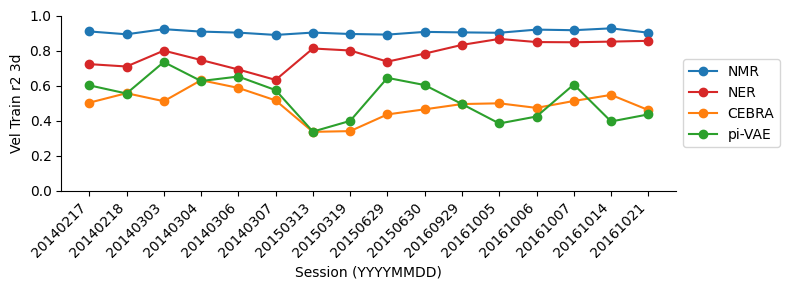

Vel Train r2 NMR = 0.9056 ± 0.0108
Vel Train r2 NER = 0.7836 ± 0.0673
Vel Train r2 CEBRA = 0.4923 ± 0.0747
Vel Train r2 pivae = 0.5297 ± 0.1152
NMR over NER = 15.56%
NMR over CEBRA = 83.96%
NMR over pi-VAE = 70.96%
NER over CEBRA = 59.19%
t-statistic nmr2ner: 7.6116 p-value: 4.74e-06
t-statistic nmr2cebra: 22.0131 p-value: 2.35e-12
t-statistic nmr2pivae: 12.5986 p-value: 6.65e-09
t-statistic ner2cebra: 9.8228 p-value: 1.90e-07


In [2]:
fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(nmr_timestamps, nmr_vel_train_r2_3d, marker='o', linestyle='-', color='#1f77b4', label='NMR')#'blue'
plt.plot(ner_timestamps, ner_vel_train_r2_3d, marker='o', linestyle='-', color='#d62728', label='NER')#'red'
plt.plot(cebra_timestamps,cebra_vel_train_r2_3d,marker='o',linestyle='-',color='#ff7f0e',label='CEBRA')#'orange'
plt.plot(pivae_timestamps,pivae_vel_train_r2_3d,marker='o',linestyle='-',color='#2ca02c',label='pi-VAE')#'green'

plt.xlabel('Session (YYYYMMDD)')
plt.ylabel('Vel Train r2 3d')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./NMR_Figs_pdf/Fig2_4models_Train_3D_M1.pdf', bbox_inches='tight')
plt.show()

print(f'Vel Train r2 NMR = {np.mean(nmr_vel_train_r2_3d):.4f} ± {np.std(nmr_vel_train_r2_3d):.4f}')
print(f'Vel Train r2 NER = {np.mean(ner_vel_train_r2_3d):.4f} ± {np.std(ner_vel_train_r2_3d):.4f}')
print(f'Vel Train r2 CEBRA = {np.mean(cebra_vel_train_r2_3d):.4f} ± {np.std(cebra_vel_train_r2_3d):.4f}')
print(f'Vel Train r2 pivae = {np.mean(pivae_vel_train_r2_3d):.4f} ± {np.std(pivae_vel_train_r2_3d):.4f}')
nmr2ner = 100*(np.mean(nmr_vel_train_r2_3d)-np.mean(ner_vel_train_r2_3d))/np.mean(ner_vel_train_r2_3d)
print(f'NMR over NER = {nmr2ner:.2f}%')
nmr2cebra = 100*(np.mean(nmr_vel_train_r2_3d)-np.mean(cebra_vel_train_r2_3d))/np.mean(cebra_vel_train_r2_3d)
print(f'NMR over CEBRA = {nmr2cebra:.2f}%')
nmr2pivae = 100*(np.mean(nmr_vel_train_r2_3d)-np.mean(pivae_vel_train_r2_3d))/np.mean(pivae_vel_train_r2_3d)
print(f'NMR over pi-VAE = {nmr2pivae:.2f}%')
ner2cebra = 100*(np.mean(ner_vel_train_r2_3d)-np.mean(cebra_vel_train_r2_3d))/np.mean(cebra_vel_train_r2_3d)
print(f'NER over CEBRA = {ner2cebra:.2f}%')
###### unpaired: ind(epent)      paired: rel(ated)     p-value*3 for multiple comparisons correction
t_stat_NN, p_val_NN = stats.ttest_rel(nmr_vel_train_r2_3d, ner_vel_train_r2_3d) 
print(f"t-statistic nmr2ner: {t_stat_NN:.4f} p-value: {p_val_NN*3:.2e}")
t_stat_NC, p_val_NC = stats.ttest_rel(nmr_vel_train_r2_3d, cebra_vel_train_r2_3d) 
print(f"t-statistic nmr2cebra: {t_stat_NC:.4f} p-value: {p_val_NC*3:.2e}")
t_stat_Np, p_val_Np = stats.ttest_rel(nmr_vel_train_r2_3d, pivae_vel_train_r2_3d) 
print(f"t-statistic nmr2pivae: {t_stat_Np:.4f} p-value: {p_val_Np*3:.2e}")
t_stat_Cp, p_val_Cp = stats.ttest_rel(ner_vel_train_r2_3d, cebra_vel_train_r2_3d) 
print(f"t-statistic ner2cebra: {t_stat_Cp:.4f} p-value: {p_val_Cp*3:.2e}")

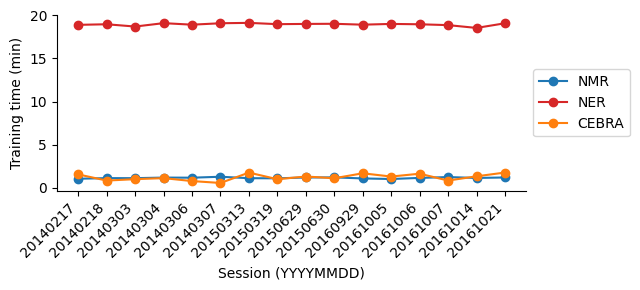

Vel Train r2 NMR = 1.1346 ± 0.0675
Vel Train r2 NER = 18.9473 ± 0.1460
Vel Train r2 CEBRA = 1.2102 ± 0.3673
t-statistic nmr2ner: -463.3613 p-value: 4.13e-32
t-statistic nmr2cebra: -0.7274 p-value: 1.43e+00
t-statistic ner2cebra: 179.9456 p-value: 5.97e-26


In [3]:
fig, ax = plt.subplots(figsize=(6.5, 3))
plt.plot(nmr_timestamps, nmr_execution_time/60, marker='o', linestyle='-', color='#1f77b4', label='NMR')
plt.plot(ner_timestamps, ner_execution_time/60, marker='o', linestyle='-', color='#d62728', label='NER') #'red'
plt.plot(cebra_timestamps, cebra_execution_time/60, marker='o', linestyle='-', color='#ff7f0e', label='CEBRA')

plt.xlabel('Session (YYYYMMDD)')
plt.ylabel('Training time (min)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0, 1)
# plt.yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('./NMR_Figs_pdf/Fig2_3models_Train_Time_M1.pdf', bbox_inches='tight')
plt.show()
print(f'Vel Train r2 NMR = {np.mean(nmr_execution_time/60):.4f} ± {np.std(nmr_execution_time/60):.4f}')
print(f'Vel Train r2 NER = {np.mean(ner_execution_time/60):.4f} ± {np.std(ner_execution_time/60):.4f}')
print(f'Vel Train r2 CEBRA = {np.mean(cebra_execution_time/60):.4f} ± {np.std(cebra_execution_time/60):.4f}')

t_stat_Np, p_val_Np = stats.ttest_rel(nmr_execution_time, ner_execution_time) 
print(f"t-statistic nmr2ner: {t_stat_Np:.4f} p-value: {p_val_Np*3:.2e}")
t_stat_NC, p_val_NC = stats.ttest_rel(nmr_execution_time, cebra_execution_time) 
print(f"t-statistic nmr2cebra: {t_stat_NC:.4f} p-value: {p_val_NC*3:.2e}")
t_stat_Cp, p_val_Cp = stats.ttest_rel(ner_execution_time, cebra_execution_time) 
print(f"t-statistic ner2cebra: {t_stat_Cp:.4f} p-value: {p_val_Cp*3:.2e}")

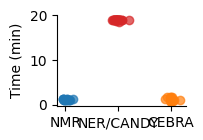

In [7]:
nmr_minutes = nmr_execution_time / 60
ner_minutes = ner_execution_time / 60
cebra_minutes = cebra_execution_time / 60

# X positions for each group
x_nmr = np.random.normal(loc=0, scale=0.05, size=len(nmr_minutes))
x_ner = np.random.normal(loc=0.75, scale=0.05, size=len(ner_minutes))
x_cebra = np.random.normal(loc=1.5, scale=0.05, size=len(cebra_minutes))

fig, ax = plt.subplots(figsize=(2.1, 1.5))

# Scatter plot with jitter
ax.scatter(x_nmr, nmr_minutes, color='#1f77b4', label='NMR', alpha=0.7)
ax.scatter(x_ner, ner_minutes, color='#d62728', label='NER', alpha=0.7) #'red'
ax.scatter(x_cebra, cebra_minutes, color='#ff7f0e', label='CEBRA', alpha=0.7)

# Group labels
ax.set_xticks([0, 0.75, 1.5])
ax.set_xticklabels(['NMR', 'NER/CANDY', 'CEBRA'])
ax.set_ylabel('Time (min)')

# Style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend()
plt.tight_layout()
plt.savefig('./NMR_Figs_pdf/Fig2_3models_Train_Time_M1.pdf', bbox_inches='tight')
plt.show()